# Polynomial Interpolation

In [3]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

**a)** For the interval $I = [-2,2] \subset \mathbb{R}$ and the three nodal point $\{\xi_i\}_{i=0}^2 = \{ -2, 0, 2\}$, calculate by hand the Lagrange basis functions $\{\lambda_i(x)\}_{i=0}^2$ of order $2$ satisfying 

$$
\lambda_i(\xi_j) =
\begin{cases}
1 &\quad \text{if } i=j
\\
0 &\quad\text{else}.
\end{cases}
$$

$$
\lambda_0(x) = \frac{x-0}{(-2)-0}\frac{x-2}{(-2)-2} =   \frac{1}{8}x^2 - \frac{1}{4}x
$$


$$
\lambda_1(x) = \frac{x-(-2)}{0-(-2)}\frac{x-2}{0-2} = -\frac{1}{4}x^2 + 1
$$


$$
\lambda_2(x) = \frac{x-(-2)}{2-(-2)}\frac{x-0}{2-0} = \frac{1}{8}x^2 + \frac{1}{4}x
$$

**b)** Next, given $N+1$ uniformly distributed
nodes $\{\xi_i\}_{i=1}^N$ on $[-2,2]$ with $\xi_0 = -2$
$\xi_N = 2$, write a function which can compute and plot all Lagrange basis functions $\{\lambda_i\}_{i=0}^N$. To make your live easy, use the interpolation functionality baked into the scipy python module, see code snippets below.

In [6]:
import scipy.interpolate as ip

def lagrange_basis(N, i):
    #Returns function which is the Lagrange basis function nr. i for N+1 uniformly distributed points in [-2,2]
    uni_nodes = np.linspace(-2,2,N+1)
    index = np.zeros(N+1)
    index[i] = 1
    L = ip.lagrange(uni_nodes, index)
    
    return L

**c)** Experiement with your brand new function you implemented in b) and see how the Lagrange basis functions look like when you increase the order $N$. In particular, provide separate figures for $N = 3,4, 7,8, 11, 12$, where each figure shows a plot of *all* basis function $\{\lambda_i\}_{i=0}^N$ for that particular $N$. In theses figures, mark the nodal points on the $x$-axis clearly so that you can easily check whether your Lagrange basis functions satisfy $\lambda_i(\xi_j) = \delta_{ij}$.

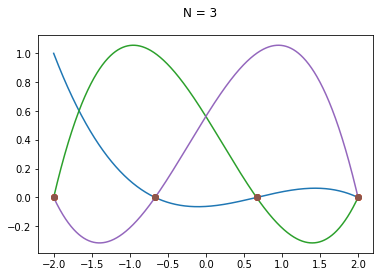

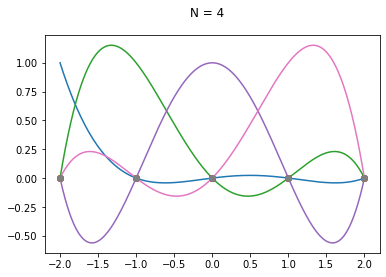

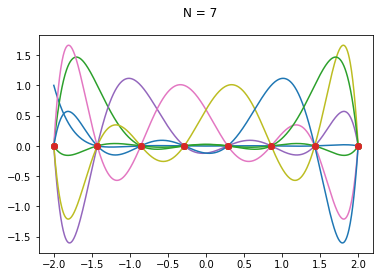

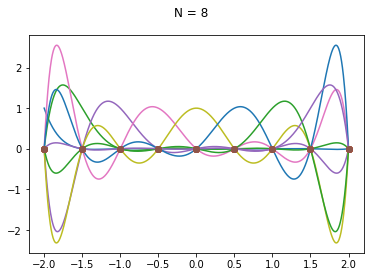

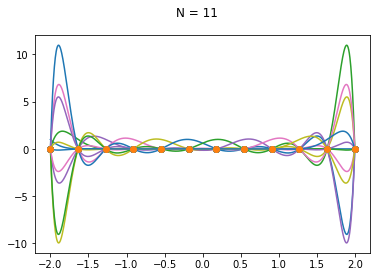

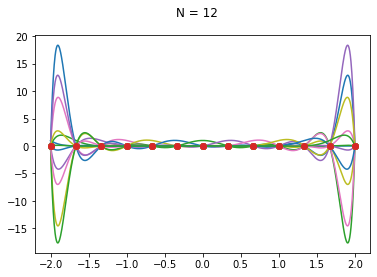

In [12]:
x_plot = np.linspace(-2,2,1001)

for N in [3,4,7,8,11,12]:
    plt.figure()
    plt.suptitle(("N = ") + str(N))
    for i in range(N):
        L = lagrange_basis(N,i)
        plt.plot(x_plot, L(x_plot))
        
        uni_nodes = np.linspace(-2,2,N+1)
        plt.plot(uni_nodes, 0*uni_nodes,'o')

**d)** For the function $f(x) = \sin(x)$ , compute the $𝑁$th-order Lagrange polynom  $\pi^Nf $  satisfying $(\pi^Nf)(\xi_i) = f(\xi_i)$  for  $i=0,…𝑁$ and plot both the exact function $f$ and its Lagrange interpolant $\pi^Nf$ for $𝑁=3,4,7,8,11,12$  with one figure for each $N$. As before chose $I=[−2,2]$ and a uniform nodes distribution which includes the end point of the $I$ . What can you say about the maximum error $\max_{x\in [-2,2]}|\pi^Nf(x)-f(x)|$ for increasning $N$?

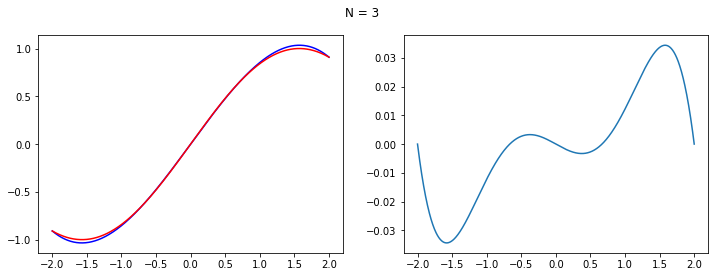

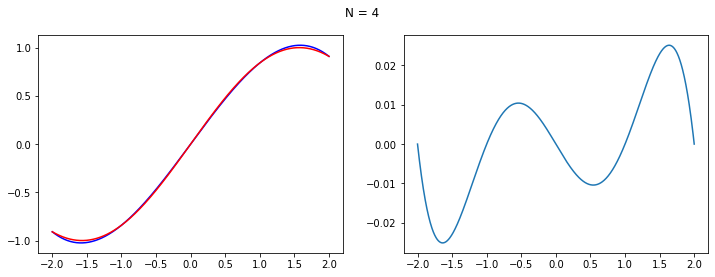

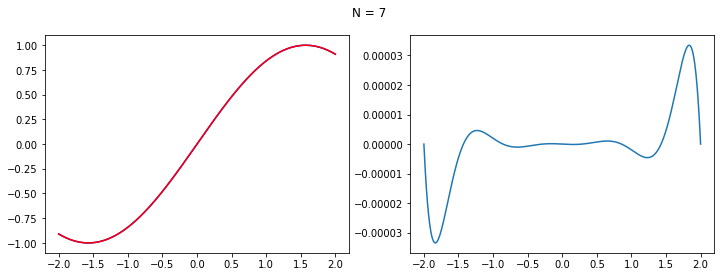

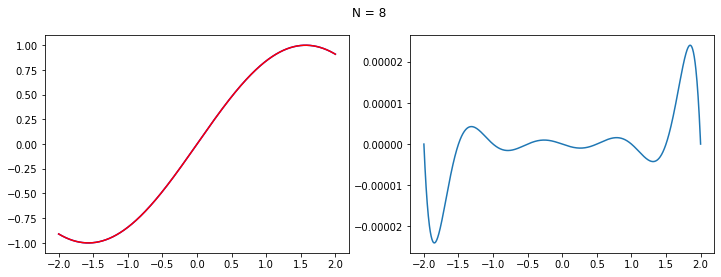

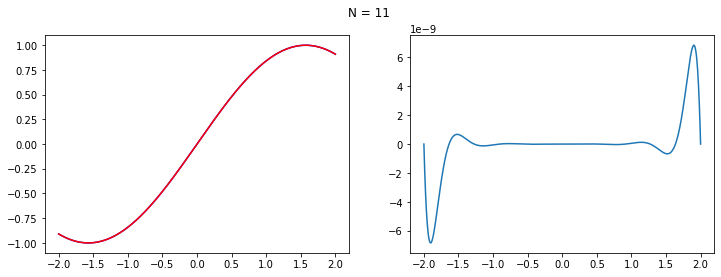

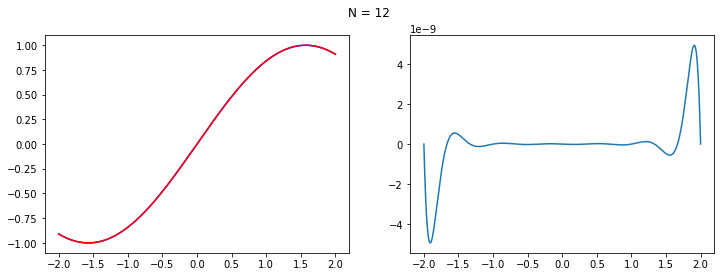

In [10]:
x_plot = np.linspace(-2,2,1001)

for N in [3,4,7,8,11,12]:
    
    uni_nodes = np.linspace(-2,2,N+1)
    f_vals = np.sin(uni_nodes)
    L = ip.lagrange(uni_nodes, f_vals)
    
    plt.figure(figsize=(12,4))
    plt.suptitle(("N = ") + str(N))
    
    plt.subplot(1,2,1)
    plt.plot(x_plot, L(x_plot), 'b')
    plt.plot(x_plot, np.sin(x_plot), 'r')
    
    plt.subplot(1,2,2)
    plt.plot(x_plot, L(x_plot)-np.sin(x_plot))
    

**e)** Now repeat the problem above with the function $f(x) = e^{-8x^2}$. What can you say about the error? Where does the error seem to concentrate?

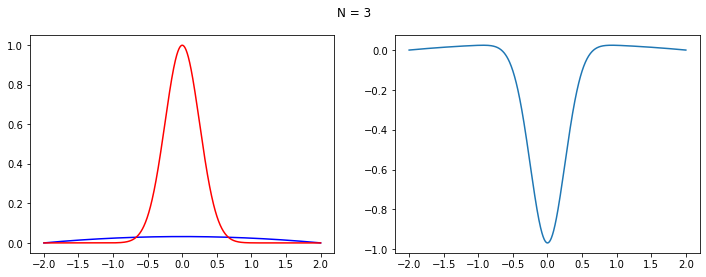

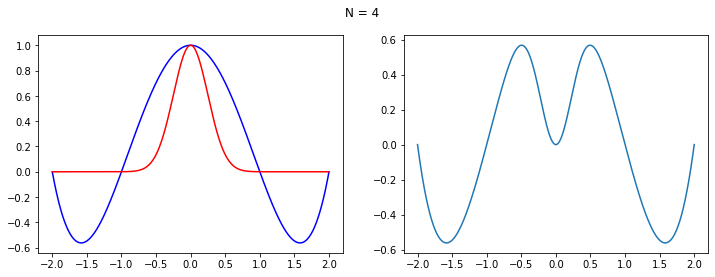

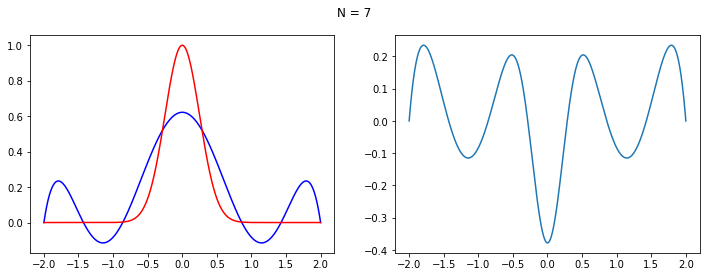

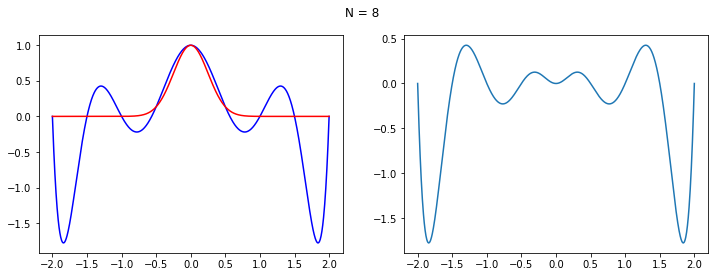

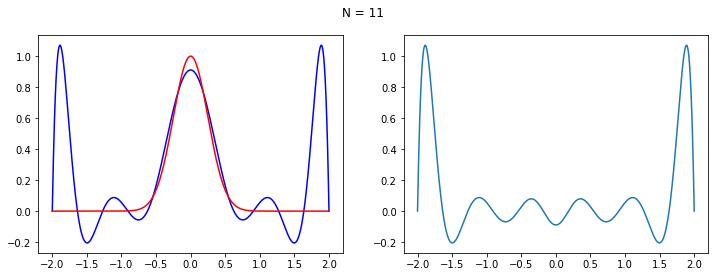

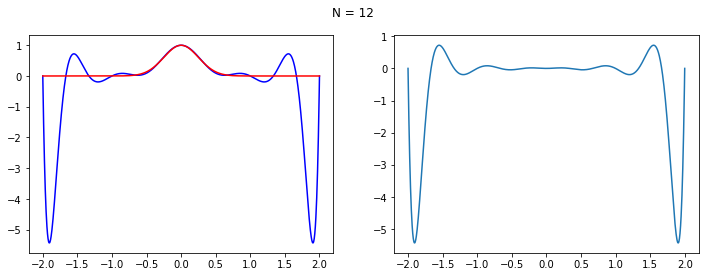

In [14]:
x_plot = np.linspace(-2,2,1001)

f = lambda x:np.exp(-8*x**2)

for N in [3,4,7,8,11,12]:
    
    uni_nodes = np.linspace(-2,2,N+1)
    f_vals = f(uni_nodes)
    L = ip.lagrange(uni_nodes, f_vals)
    
    plt.figure(figsize=(12,4))
    plt.suptitle(("N = ") + str(N))
    
    plt.subplot(1,2,1)
    plt.plot(x_plot, L(x_plot), 'b')
    plt.plot(x_plot, f(x_plot), 'r')
    
    plt.subplot(1,2,2)
    plt.plot(x_plot, L(x_plot)-f(x_plot))
    

**f)** The Chebyshev nodes on the interval $[a,b]$ are defined as
$$
\xi_i = \dfrac{a+b}{2} + \dfrac{b - a}{2} \cos\left(\tfrac{i}{N}\pi\right),\quad i=0,...,N.
$$
Repeat section **c)** but with the Chebyshev nodes. What is the difference in how the points are distributed? Do you notice anything different about the Lagrange functions?


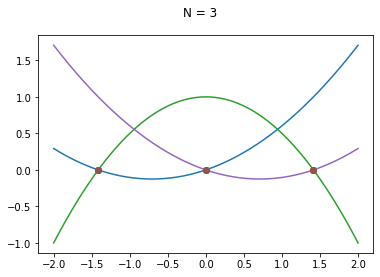

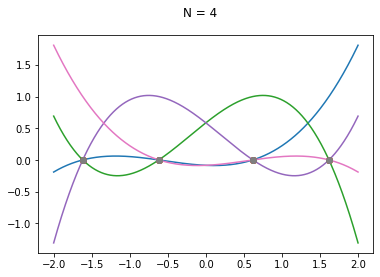

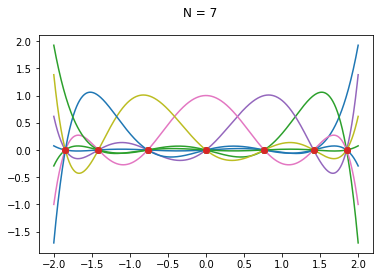

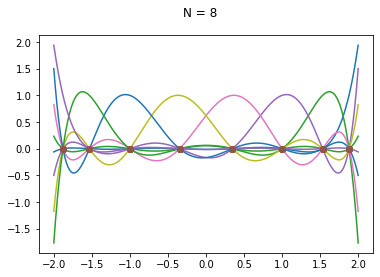

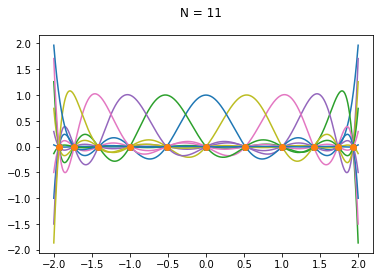

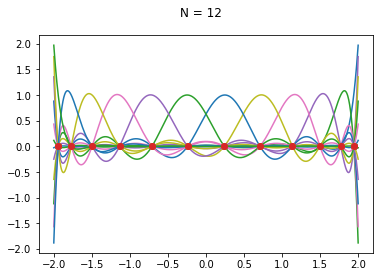

In [18]:
def lagrange_chebyshev(N, i):
    #Returns function which is the Lagrange basis function nr. i for N+1 uniformly distributed points in [-2,2]
    ch_nodes = [2*np.cos(i*np.pi/(N+1)) for i in range(1,N+1)]
    index = np.zeros(N+1)
    index[i] = 1
    L = ip.lagrange(ch_nodes, index)
    
    return L

x_plot = np.linspace(-2,2,1001)

for N in [3,4,7,8,11,12]:
    plt.figure()
    plt.suptitle(("N = ") + str(N))
    for i in range(N):
        L = lagrange_chebyshev(N,i)
        plt.plot(x_plot, L(x_plot))
        
        ch_nodes = [2*np.cos(i*np.pi/(N+1)) for i in range(1,N+1)]
        plt.plot(ch_nodes, 0*np.array(ch_nodes),'o')


**g)** Now repeat section **e)** but with the Chebyshev nodes. What is the difference, compared with the uniformly distributed nodes?

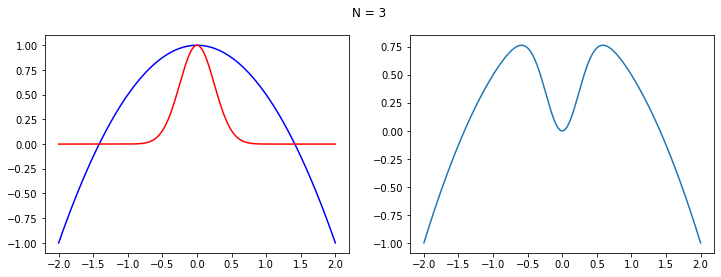

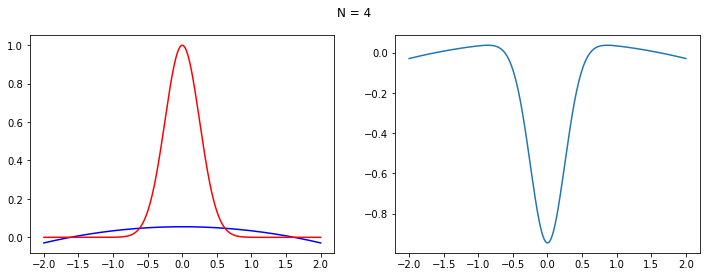

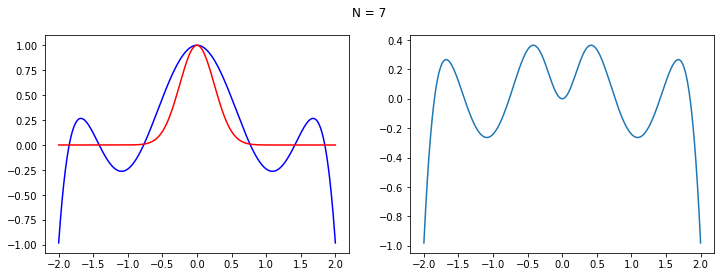

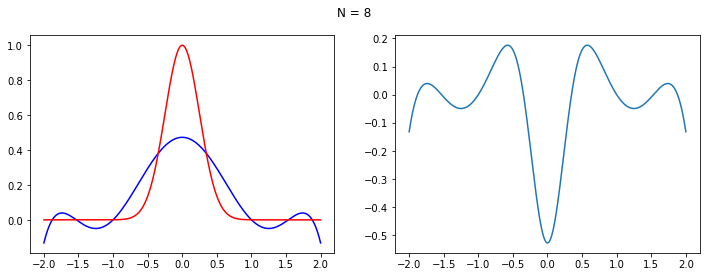

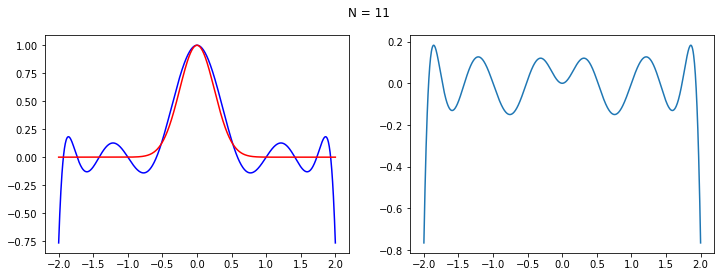

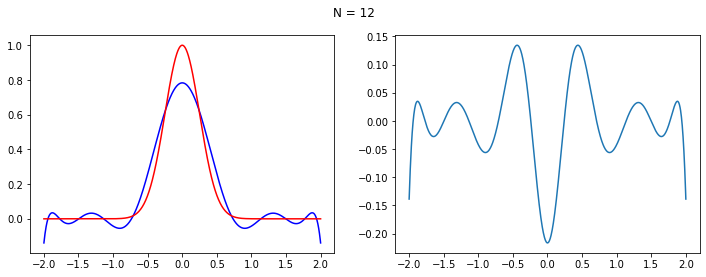

In [20]:
x_plot = np.linspace(-2,2,1001)

f = lambda x:np.exp(-8*x**2)

for N in [3,4,7,8,11,12]:
    
    ch_nodes = np.array([2*np.cos(i*np.pi/(N+1)) for i in range(1,N+1)])
    f_vals = f(ch_nodes)
    L = ip.lagrange(ch_nodes, f_vals)
    
    plt.figure(figsize=(12,4))
    plt.suptitle(("N = ") + str(N))
    
    plt.subplot(1,2,1)
    plt.plot(x_plot, L(x_plot), 'b')
    plt.plot(x_plot, f(x_plot), 'r')
    
    plt.subplot(1,2,2)
    plt.plot(x_plot, L(x_plot)-f(x_plot))

### Hints and Code Snippets


Interpolation functionality can be found in the module scipy.interpolate module,
see https://docs.scipy.org/doc/scipy-0.19.1/reference/interpolate.html
and in particular the documentation for the [scipy.interpolate.lagrange](
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange)
function. Note that this function will choose the polynomial order based on the number
of nodal/data points you pass to it. So if you pass $k$ data points, the interpolation polynomial
will be of order $k-1$.

In [ ]:
import scipy.interpolate as ip

Lagrange interpolation polynom can be computed like this.

In [ ]:
# x_nodes is a 1 dimensional array containing the nodal points
# nodal_values is a 1 dimensional array containing the values of the
# function to be interpolated at the nodal points
L = ip.lagrange(x_nodes,nodal_values)

Observe that you can compute the Lagrange basis functions $\lambda_i$ associated
with node $\xi_i$ by simply passing a "nodal_values" array which is $1$ for index $i$ and $0$ otherwise.